Insurance Claim Fraud Detection

Problem Statement:

Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
# to import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to import dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# to check column names
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
# to check basic details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

dataset has 1000 rows and 40 columns, three datatypes- int64,object and float64. There are no null values in any column except for _c39.

_c39 has complete null values, so i can drop that column.

In [5]:
#Droping _c39 column
df = df.drop(["_c39"],axis=1)

In [6]:
# to Check unique values of each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

policy_number and incident_location columns have 1000 unique counts. These 2 columns do not have any contribution for model building so lets drop these columns.

In [7]:
# to Drop policy_number and incident_location column
df = df.drop(["policy_number"],axis=1)
df = df.drop(["incident_location"],axis=1)

In [8]:
# to check the shape
df.shape

(1000, 37)

In [9]:
# to check for categorical columns
obj_columns = []

for i in df.dtypes.index:
    if df.dtypes[i] == "O":
        obj_columns.append(i)
obj_columns     

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [10]:
# to get value count of  all Categorical data using for_loop method
for x in obj_columns:
    print(x)
    print(df[x].value_counts())
    print("-"*70)

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
----------------------------------------------------------------------
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------------------------------------------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----------------------------------------------------------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
----------------------------------------------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
----------------------------------

In [11]:
# # to check for numerical columns
num_columns = [] 

for i in df.dtypes.index:
    if df.dtypes[i] != "O":
        num_columns.append(i)
num_columns     

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [12]:
# to get value count of all numerical data using for_loop method
for x in num_columns:
    print(x)
    print(df[x].value_counts())
    print("-"*70)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
----------------------------------------------------------------------
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
----------------------------------------------------------------------
policy_deductable
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
----------------------------------------------------------------------
policy_annual_premium
1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13  

The value counts of column umbrella_limit have 80% zeros, so we can drop this column as it will not contribute in model bulding and create skewness in the data.

There are some '?' in 3 columns which need to be replaced

collision type
property_damage
police_report_available
insured zip have 995 unique values. so, we can drop this column.

In [13]:
# to Drop umbrella_limit column having 80% zeros
df=df.drop(["umbrella_limit"],axis=1)

In [14]:
#to Drop insured_zip column 
df = df.drop(["insured_zip"],axis=1)

# Feature extraction:
policy_csl column can be extract two other columns for better analysis

In [15]:
# to extract columns from policy_csl
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

policy_csl was object type data before now i have to convert extracted data from object to int dtype.

In [16]:
# to Change dtype of extracted column
df[['csl_per_person']] = df[['csl_per_person']].astype('int64')
df[['csl_per_accident']] = df[['csl_per_accident']].astype('int64')

In [17]:
# to drop policy_csl column after extraction
df = df.drop(["policy_csl"],axis=1)

In [18]:
# to extract auto_age from auto year
df['auto_age'] = 2018 - df['auto_year']

In [19]:
#to drop auto_year column after extraction
df = df.drop(["auto_year"],axis=1)

Now i have to extract day,month and yeay from incident_date and policy_bind_date.

In [20]:
#to Convert object data type to datetime 
df['policy_bind_date'] =  pd.to_datetime(df['policy_bind_date'])
df['incident_date'] =  pd.to_datetime(df['incident_date'])

In [21]:
#Checking the data types of all columns again
df.shape

(1000, 36)

In [22]:
#to extract policy_bind year,month and day from policy_bind_date

# year
df["policy_bind_year"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.year

# month
df["policy_bind_month"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.month

# day
df["policy_bind_day"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.day

In [23]:
# to drop policy_bind_date column after extraction
df = df.drop(["policy_bind_date"],axis=1)

In [24]:
# to extracting incident year,month and day from incident_date

# year
df["incident_year"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.year

# month
df["incident_month"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.month

# day
df["incident_day"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.day

In [25]:
#to Drop incident_date column after extraction
df = df.drop(["incident_date"],axis=1)

In [26]:

df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,Y,250,500,14,2014,10,17,2015,1,25
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,Y,250,500,11,2006,6,27,2015,1,21
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,N,100,300,11,2000,6,9,2015,2,22
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Y,250,500,4,1990,5,25,2015,10,1
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,N,500,1000,9,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,N,500,1000,12,1991,7,16,2015,2,22
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,N,100,300,3,2014,5,1,2015,1,24
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,N,250,500,22,2003,2,17,2015,1,23
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,N,500,1000,20,2011,11,18,2015,2,26


incident_year has only one unique value so it does not help for model training so lets drop that column.

In [27]:
# to drop incident_year column after extraction
df = df.drop(["incident_year"],axis=1)

To replace all '?' with there mean values.



In [28]:
# to check columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [29]:
# to check the mode of collision_type column 
df["collision_type"].mode() 

0    Rear Collision
Name: collision_type, dtype: object

In [30]:
# to replace '?' with mode value
df['collision_type'] = df.collision_type.str.replace('?', 'Rear Collision')

In [31]:
# to check the value counts of property_damage column
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [32]:
# to replace '?' with mode value
df['property_damage'] = df.property_damage.str.replace('?', 'NO')

In [33]:
# to Check the value counts of police_report_available column
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [34]:
# to replace '?' with mode value
df['police_report_available'] = df.police_report_available.str.replace('?', 'NO')

In [35]:
#lets check dataset after updating
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,250,500,14,2014,10,17,1,25
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,250,500,11,2006,6,27,1,21
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,100,300,11,2000,6,9,2,22
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,250,500,4,1990,5,25,10,1
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,500,1000,9,2014,6,6,2,17


In [36]:
df.shape

(1000, 39)

In [37]:
# to Check statistical description of data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.95400,115.113174,0.00,115.7500,199.5,276.250,479.00
age,1000.0,38.94800,9.140287,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1136.00000,611.864673,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
capital-gains,1000.0,25126.10000,27872.187708,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-26793.70000,28104.096686,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,11.64400,6.951373,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.83900,1.018880,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,0.99200,0.820127,0.00,0.0000,1.0,2.000,2.00
witnesses,1000.0,1.48700,1.111335,0.00,1.0000,1.0,2.000,3.00


In the dataset the many columns have high standard deveation from the mean, which means presence of many outliers in the data.
It also shows that all columns are skewed.

Visualization

In [38]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [39]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'csl_per_person', 'csl_per_accident', 'auto_age', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day', 'incident_month', 'incident_day']


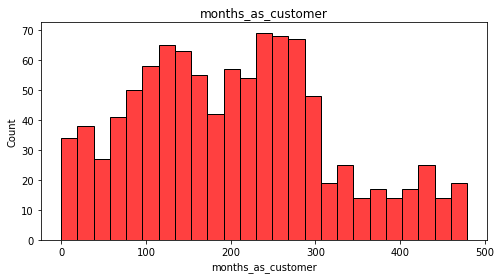

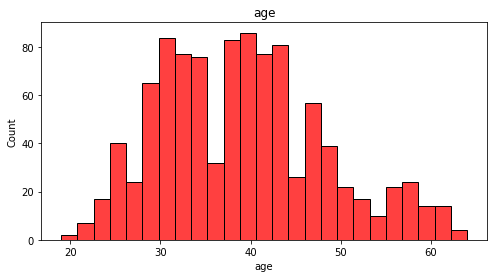

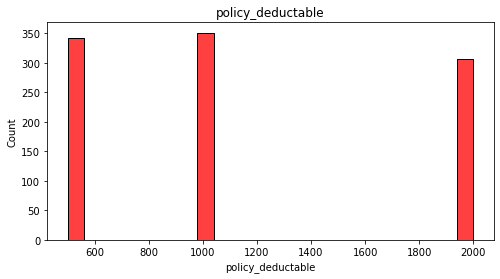

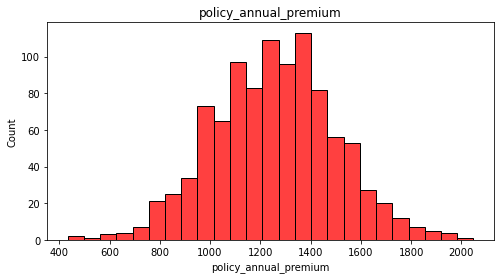

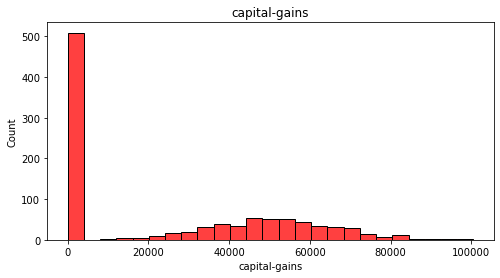

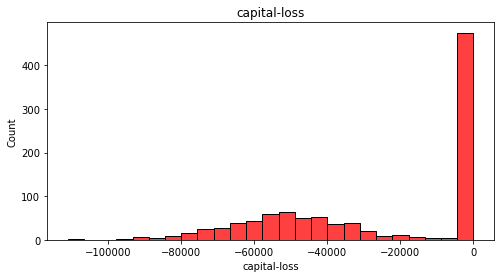

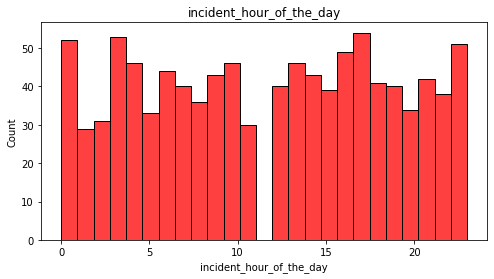

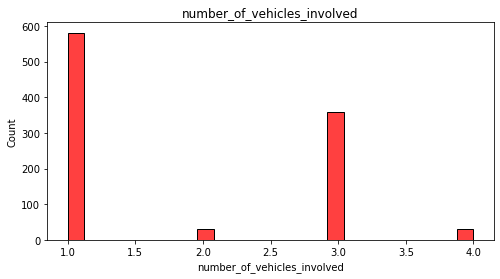

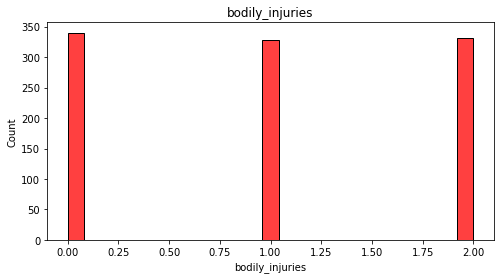

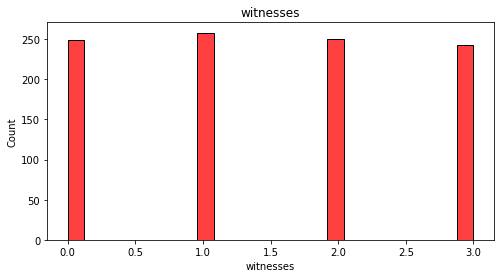

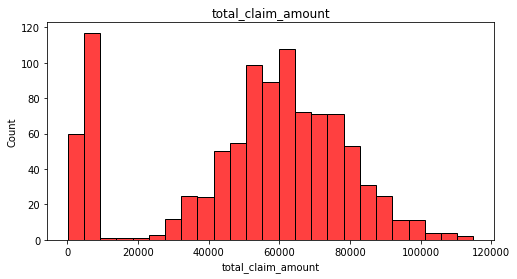

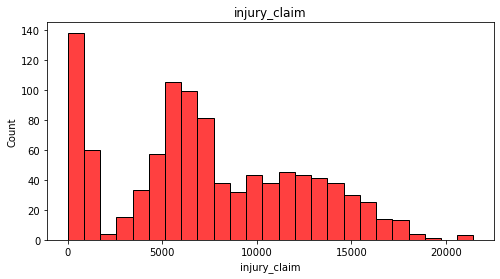

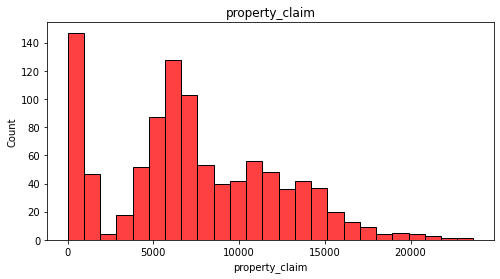

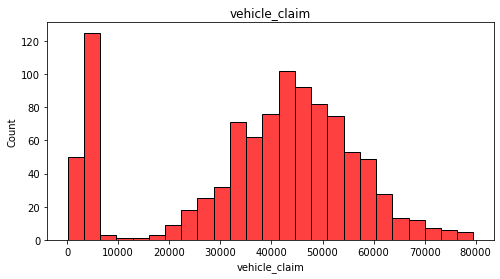

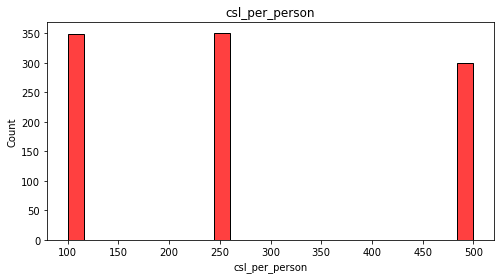

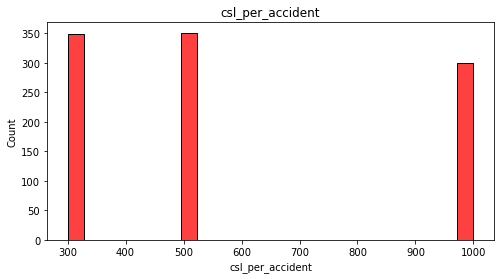

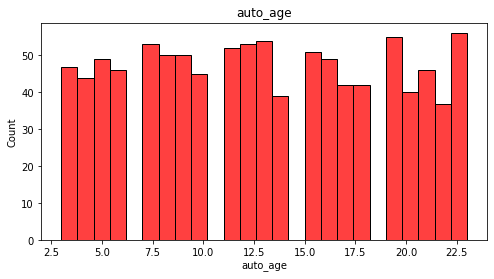

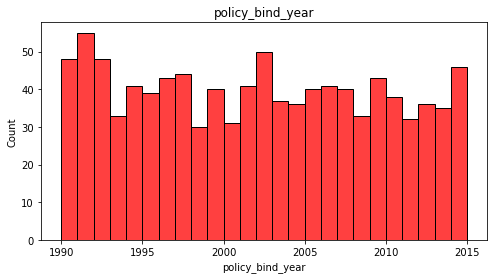

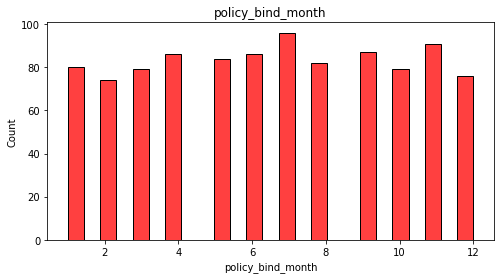

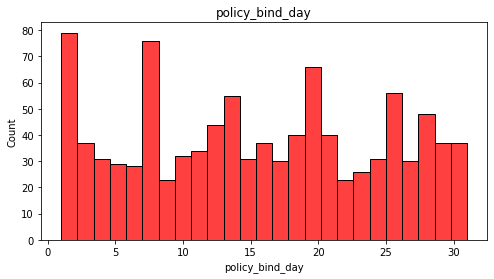

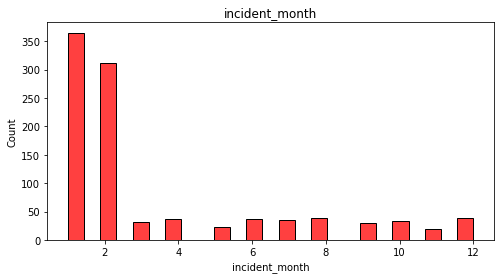

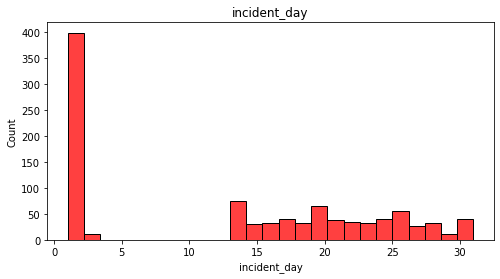

In [40]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.histplot(df[i], bins = 25, color="r")
    plt.title(i)
    plt.show()

policy_deductable, capital-gains, capital-loss, number_of_vehicles_involved, bodily_injuries, witness, total_claim_amount, injury_claim, property_claim, vehicle_claim, incident_month and incident_day has some skewness so i have to take care of that.

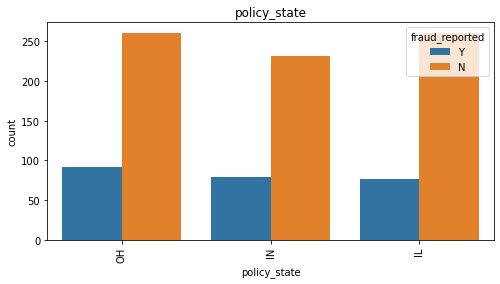

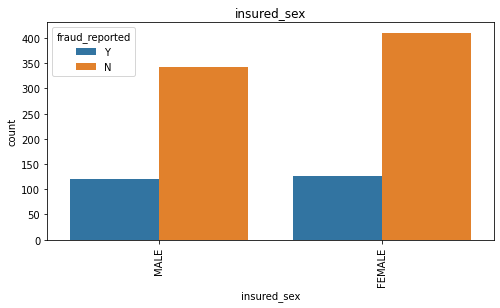

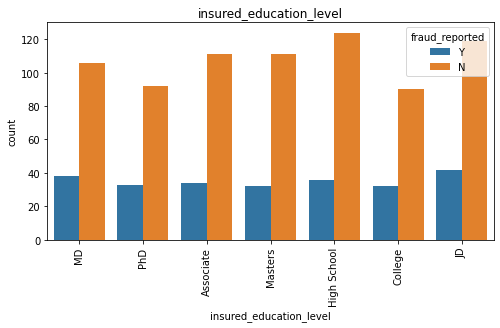

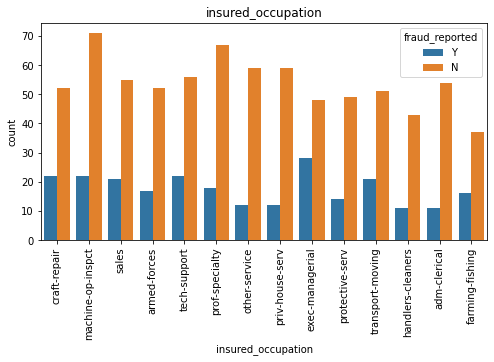

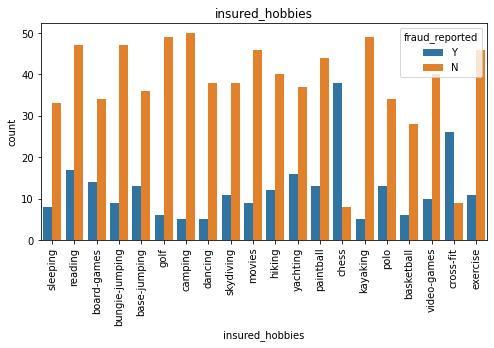

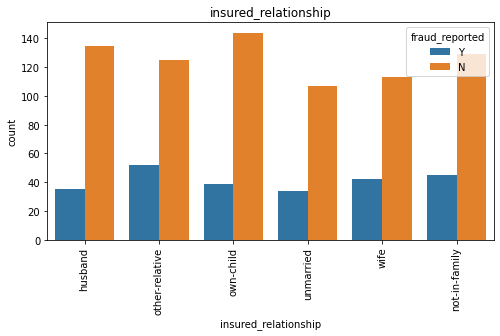

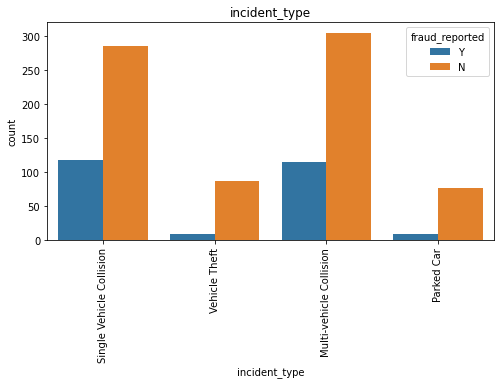

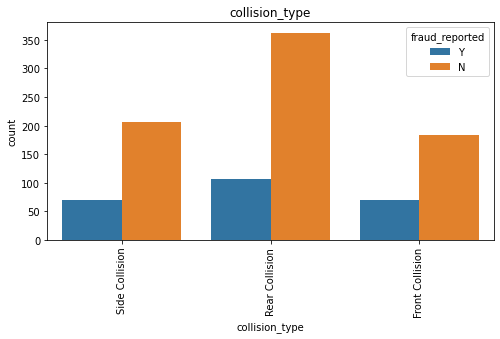

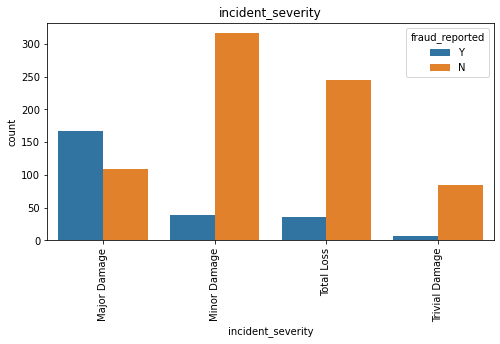

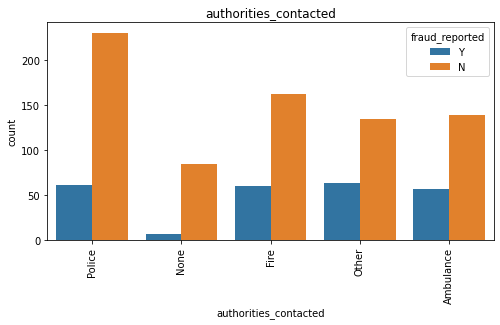

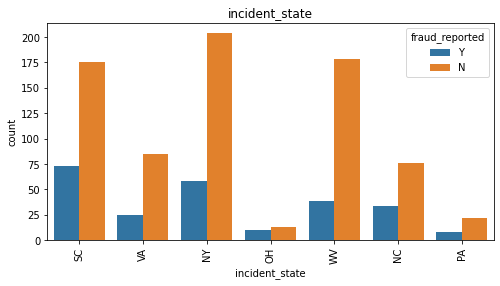

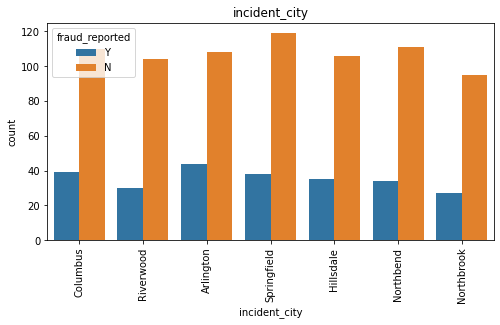

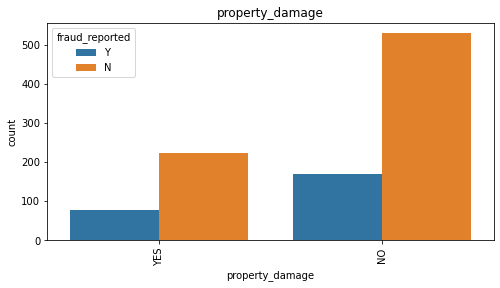

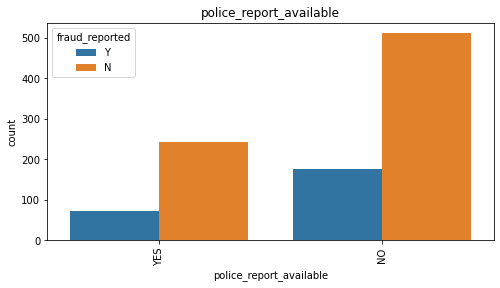

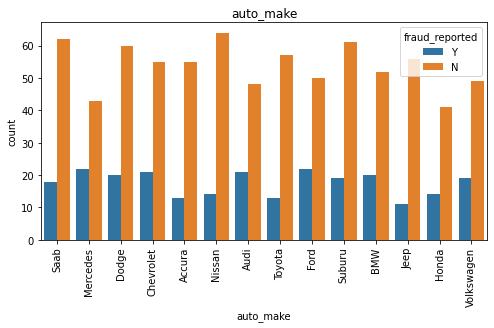

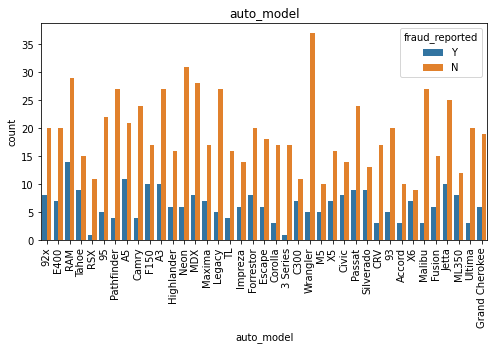

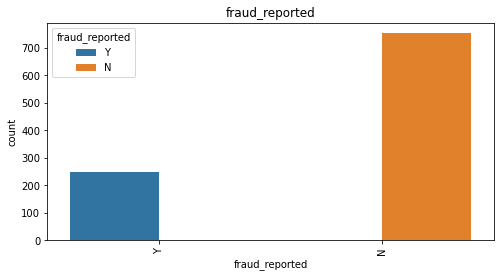

In [41]:
#Distribution plot for all categorical columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(x=df[i], hue ='fraud_reported',data=df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

By looking into the count plots below are my observations.

OH policy_state count is high and high number of fraud are also reported here.

Female insured are more in number however almost equal number of frauds are reported for both male and female.

JD High school qualified insured are more in number.

Machine-op-inspct are high in number however exec-managerial reported more number of frauds.

Most of the insured persons are having reading as their hobby.People with chess as hobby reported very high number of frauds.

own-child has maximum count in insured_relationship.

Multi-vehicle-collision and single-vehicle-collision are more in number and both reported almost equal number of frauds.

Rather than front and side collision Rear Collision has maximum count.

Minor damage has maximum count however major damage reported more number of frauds.

Police authority is mostly contacted.

In NY state most of the cases are registered and PA registered least number of cases.

In all the cities the insuered climb are almost similar.

There is very less count for property damage.

Very less cases have police_report_available.

Nissan has high number of cases compare to other car brands.

Target column (fraud_reported)is imbalanced


# Data Cleaning:
Checking for outliers:

months_as_customer                AxesSubplot(0.125,0.749828;0.133621x0.130172)
age                            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
policy_deductable               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
policy_annual_premium          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
capital-gains                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
capital-loss                      AxesSubplot(0.125,0.593621;0.133621x0.130172)
incident_hour_of_the_day       AxesSubplot(0.285345,0.593621;0.133621x0.130172)
number_of_vehicles_involved     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
bodily_injuries                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
witnesses                      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
total_claim_amount                AxesSubplot(0.125,0.437414;0.133621x0.130172)
injury_claim                   AxesSubplot(0.285345,0.437414;0.133621x0.130172)
property_claim                  AxesSubp

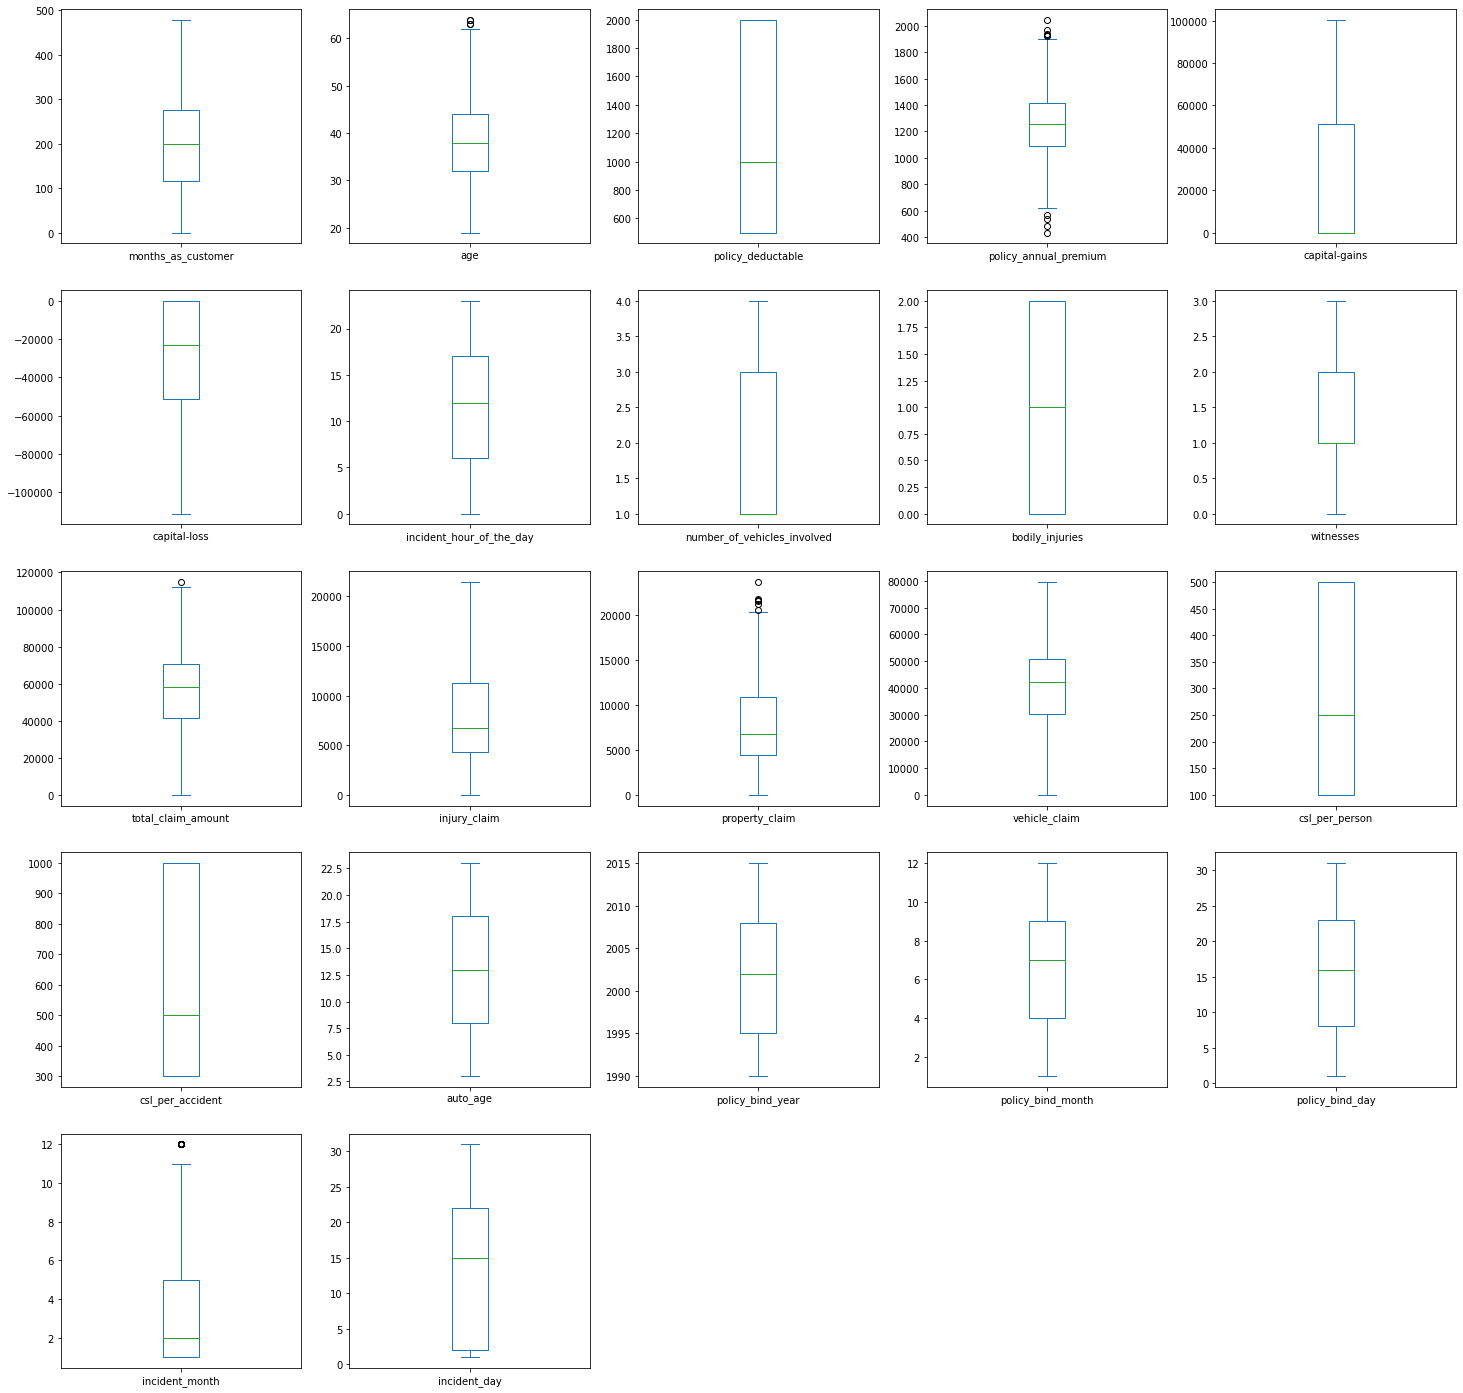

In [42]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

There are outliers in

age - (numerical)

policy_annual_premium - (numerical)

total_claim_amount - (numerical)

property_claim - (numerical)

incident_month - (numerical)

So all the columns with outliers are numerical so, have to remove the outliers in these columns.


# Removing Outliers:
i) Zscore method:

In [43]:
# to creat a list of features having outliers
features=df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_month']]

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]

Skewness is removed using zscore method.



In [45]:
# to checking shape of new dataset after removing skewness
df_new.shape

(996, 39)

In [46]:
#Checking dataloss in zscore method
Dataloss = (((1000-996)/1000)*100)
Dataloss

0.4

Using Zscore 0.4% data lost,which is less than 10%,and with in the acceptable range.


Checking for skewness:



In [47]:
# to check for skewness
df_new.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
csl_per_person                 0.413713
csl_per_accident               0.609316
auto_age                       0.049276
policy_bind_year               0.058499
policy_bind_month             -0.029722
policy_bind_day                0.028923
incident_month                 1.377097
incident_day                   0.055659
dtype: float64

There is skewness in

total_claim_amount

vehicle_claim

csl_per_accident

incident_month

# Removing skewness using yeo-johnson method:



In [48]:
# to Create a list of skewed features
fea=["total_claim_amount","vehicle_claim","csl_per_accident","incident_month"]

Taking a list as fea with all the columns with skewness.



In [49]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [50]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)


In [51]:
#Checking skewness again
df_new[fea].skew()

total_claim_amount   -0.508953
vehicle_claim        -0.521354
csl_per_accident      0.110964
incident_month        0.305741
dtype: float64

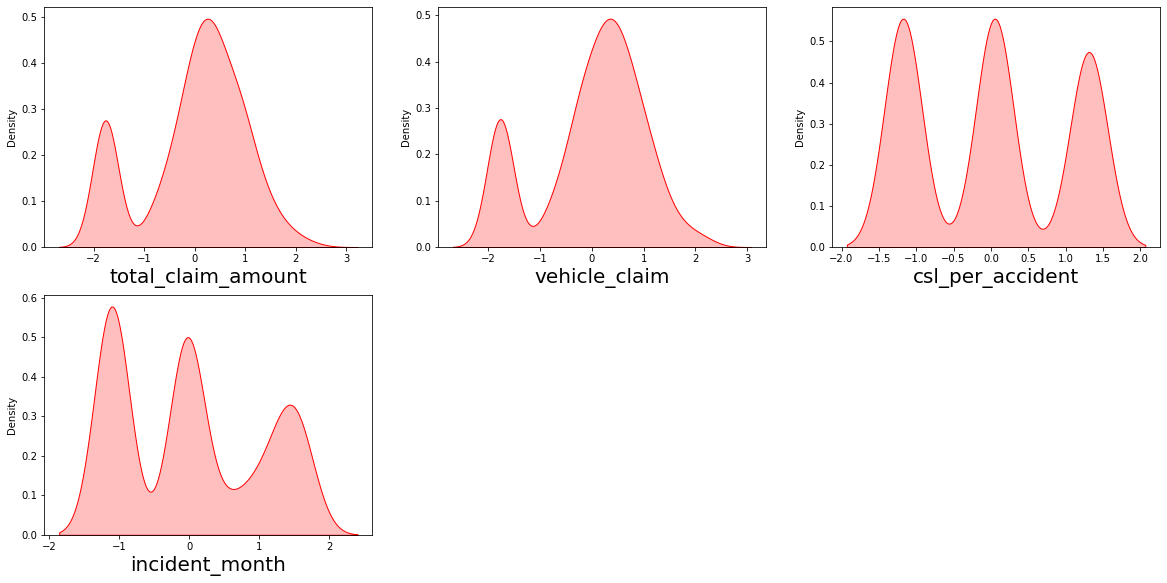

In [52]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Label Encoding:

In [53]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Above are the list of categorical columns in new dataset.



In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [55]:
df_new[cat_col].head()


,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1,1
1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12,1
2,2,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30,0
3,0,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34,1
4,0,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31,0


# Checking correlation using heat map:

In [56]:
cor=df_new.corr()
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.002908,0.020966,-0.022063,-0.022928,-0.001287,-0.046010,0.004955,0.054175,0.019029,-0.013502
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.016258,0.012408,-0.012844,-0.012459,-0.003268,-0.035505,0.015874,0.054465,0.016685,-0.008174
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,-0.024513,0.028864,-0.005866,-0.000653,-0.002323,-0.005709,0.071527,0.001030,0.026233,0.013370
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,-0.003597,0.015833,0.006634,0.006179,-0.027497,-0.048465,-0.051368,0.011204,-0.000169,-0.018867
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.034998,-0.010174,0.028569,0.030755,0.040439,0.001650,-0.028452,-0.030886,-0.012386,0.016400
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.017679,0.032173,-0.019001,-0.008959,0.028638,-0.031981,-0.007259,0.045694,0.024223,-0.007249
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.050878,0.011520,0.011093,0.010425,-0.045094,0.017801,-0.007489,0.014464,0.069312,-0.055411
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.020878,0.003335,0.018978,0.019575,0.004827,-0.025282,0.024516,-0.003030,0.013226,-0.022786
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.031208,-0.047983,-0.013322,-0.007772,0.015606,-0.013819,-0.005233,0.028387,-0.001239,0.014295
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.062286,0.017992,-0.022125,-0.031298,0.026099,-0.006190,0.040931,0.008900,0.039255,-0.083525


target column(fraud_reperted) is not correlated to any of the columns.



<AxesSubplot:>

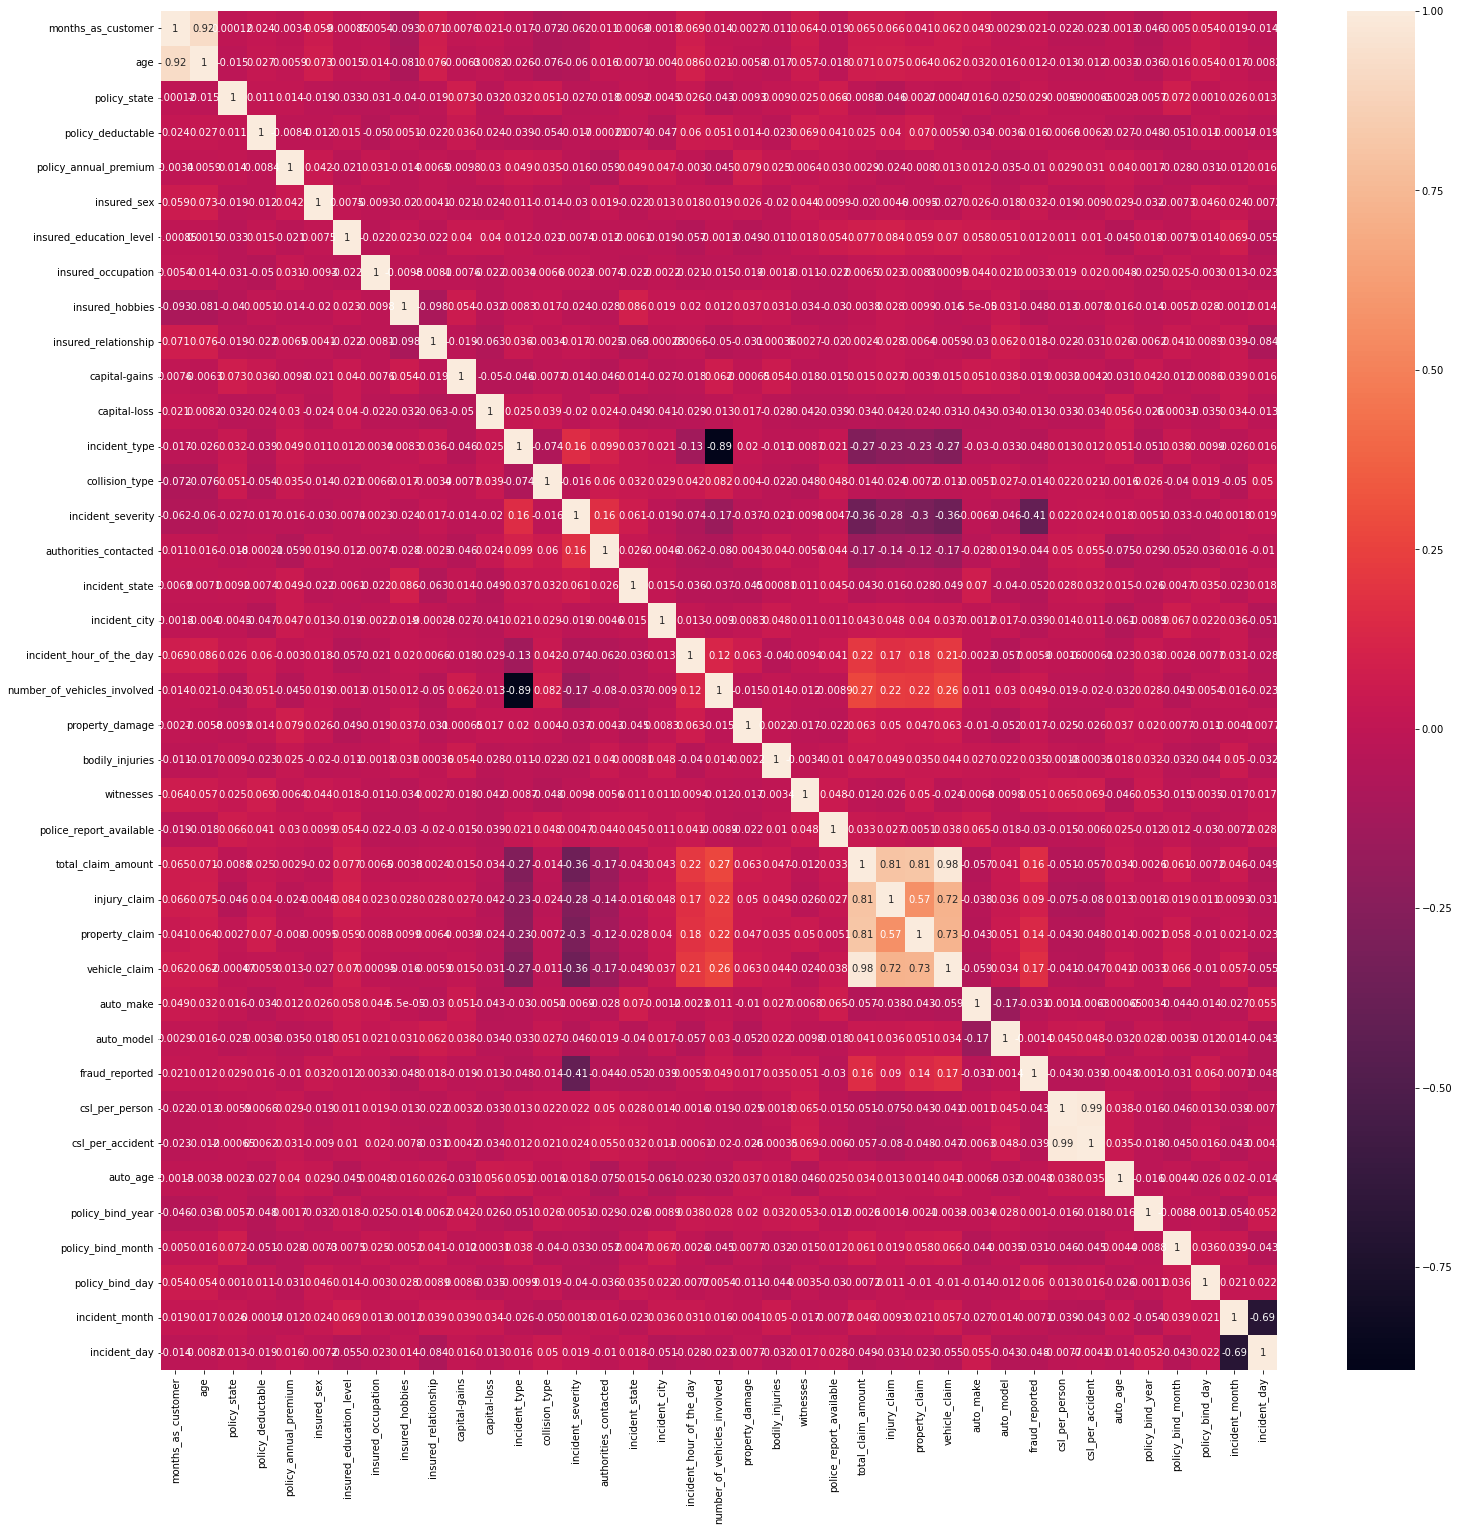

In [57]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),color ='k',annot=True)

multicolinearty can be seen in following columns-

incident type and number_of_vehicles_invovled

incident_month and incident_day

total_claim_amount and injury_claim

total_claim_amount and property_claim

injury_claim and vehicle_claim

total_claim_amount and vehicle_claim

vehicle_claim and property_claim

total_claim_amount and property_claim

*  policy_bind_year is least correlated with fraud_reported.

*  insured_occupation and auto_model are less correlated with fraud_reported.

*  auto_age and incident_hour_of_the_day also less correlated with fraud_reported.

Separating features and label:



In [58]:
x = df_new.drop("fraud_reported",axis=1)
y = df_new["fraud_reported"]

Scaling the data using standard scaler:


In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [60]:
X.head()


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,1.074671,0.987190,1.186130,-0.224722,0.621371,1.075102,0.531088,-1.162296,1.280299,-1.436113,...,0.857248,-1.644810,-0.137684,0.052612,0.182338,1.686176,1.013751,0.177487,-1.101370,1.139807
1,0.204846,0.330455,-0.018137,1.409024,-0.251375,1.075102,0.531088,-0.166257,0.928186,-0.246617,...,0.360986,-0.657437,-0.137684,0.052612,-0.316587,0.599693,-0.166145,1.309223,-1.101370,0.756374
2,-0.612790,-1.092470,1.186130,1.409024,0.647301,-0.930144,1.557206,1.078792,-1.360550,0.348131,...,-0.631538,0.958263,-1.066352,-1.174021,-0.316587,-0.215170,-0.166145,-0.727901,-0.026479,0.852233
3,0.448397,0.221000,-1.222403,1.409024,0.658123,-0.930144,1.557206,-1.411305,-1.360550,0.942878,...,-0.879669,1.317308,-0.137684,0.052612,-1.480744,-1.573274,-0.461119,1.082875,1.553647,-1.160788
4,0.204846,0.549367,-1.222403,-0.224722,1.358059,1.075102,-1.521148,1.078792,-1.360550,0.942878,...,-1.624063,1.048024,1.410096,1.313327,-0.649203,1.686176,-0.166145,-1.067422,-0.026479,0.372942


Checking multicolinearity using VIF:



In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.851319,months_as_customer
1,6.855557,age
2,1.039410,policy_state
3,1.045656,policy_deductable
4,1.037450,policy_annual_premium
5,1.037410,insured_sex
6,1.047043,insured_education_level
7,1.017493,insured_occupation
8,1.052669,insured_hobbies
9,1.052965,insured_relationship


In [62]:
#Droping high VIF columns
X = X.drop(["csl_per_accident"],axis=1)

In [63]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.848795,months_as_customer
1,6.853030,age
2,1.038097,policy_state
3,1.045485,policy_deductable
4,1.037039,policy_annual_premium
5,1.032120,insured_sex
6,1.047043,insured_education_level
7,1.017381,insured_occupation
8,1.051265,insured_hobbies
9,1.048671,insured_relationship


In [64]:
#Droping high VIF columns
X = X.drop(["total_claim_amount"],axis=1)

In [65]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.847077,months_as_customer
1,6.852905,age
2,1.038072,policy_state
3,1.043977,policy_deductable
4,1.036330,policy_annual_premium
5,1.029258,insured_sex
6,1.046990,insured_education_level
7,1.016674,insured_occupation
8,1.049392,insured_hobbies
9,1.048658,insured_relationship


multicolinearity issue is resolved. All the VIF values are below 10.


Balancing the target variable using oversampling:



In [66]:
#Checking the value count of target column
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [68]:
# Checking the value counts again
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

Finding Best Random State and Accuracy:



In [69]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = ExtraTreesClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.94  on Random_state  58


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [72]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

i) RandomForestClassifier:



In [73]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9022222222222223
Confusion Matrix: [[212  19]
 [ 25 194]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       231
           1       0.91      0.89      0.90       219

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



ii) ExtraTreeClassifier:


In [74]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.9288888888888889
Confusion Matrix: [[214  17]
 [ 15 204]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       231
           1       0.92      0.93      0.93       219

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



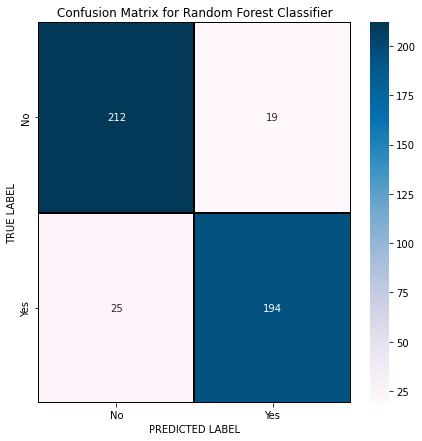

In [75]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

iii) Gradient Boosting Classifier:

In [76]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.9244444444444444
Confusion Matrix: [[216  15]
 [ 19 200]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       231
           1       0.93      0.91      0.92       219

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



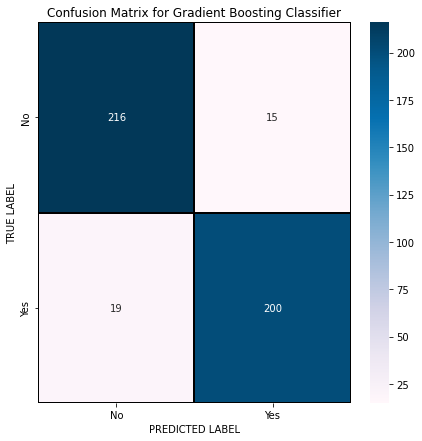

In [77]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

iv) SupportVectorClassifier:



In [78]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8911111111111111
Confusion Matrix: [[200  31]
 [ 18 201]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       231
           1       0.87      0.92      0.89       219

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



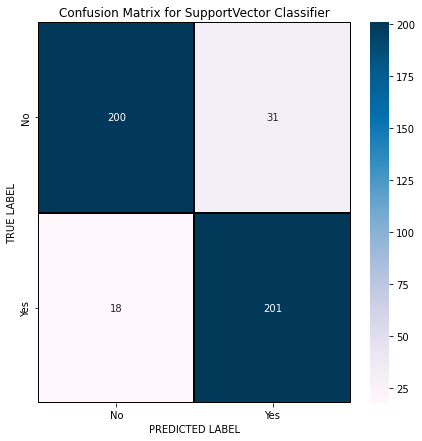

In [79]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportVector Classifier')
plt.show()

Cross validation scores:



In [80]:
#Importing library
from sklearn.model_selection import cross_val_score

In [81]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8699999999999999


In [82]:
# cv score for Extra Trees Classifier
print(cross_val_score(ETC,X,y,cv=5).mean())

0.9166666666666666


In [83]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8666666666666666


In [84]:
# cv score for Support vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8713333333333333


Extra Trees Classifier gives best score.



# Hyper Parameter tuning:



In [85]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [86]:
# Giving the parameters list for ETC model.
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,12,15,20,22],
             'n_estimators':[500,700,1000,1200],
             'max_features':['aoto','sqrt','log2'],
             'min_samples_split': [2]}

In [87]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_mod=ExtraTreesClassifier(criterion='gini', max_depth=20,max_features='log2', min_samples_split=2, n_estimators=1000)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
from sklearn.metrics import accuracy_score,plot_roc_curve
#Ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

# Saving the model:

In [ ]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Insurance_claim_fraud.pkl")

# Predictions

In [ ]:
# Loading the saved model
model=joblib.load("Insurance_claim_fraud.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [ ]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

predicted values and the actual values are almost similar.